<a href="https://colab.research.google.com/github/Khushboo-Verma2004/Wind-Speed-Predictor/blob/main/23189_Khushboo_Verma_Minorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MINOR PROJECT

# TASK 1 - Exploratory Data Analysis

In [ ]:
!wget https://www.dropbox.com/s/i7yqd0fz1535pcr/wind_dataset.csv?dl=0

--2023-11-14 11:48:20--  https://www.dropbox.com/s/i7yqd0fz1535pcr/wind_dataset.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/i7yqd0fz1535pcr/wind_dataset.csv [following]
--2023-11-14 11:48:21--  https://www.dropbox.com/s/raw/i7yqd0fz1535pcr/wind_dataset.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc42973b5afc611b68807f39b127.dl.dropboxusercontent.com/cd/0/inline/CHgAEru1NzZQGBTLtMLTm0Vl9xdYx3C5AW6Emdf08MatNbWmdTsS54SOHZopbCGAjhLgWPEu8GDmU8k7LLqZVsTO18KubhYDpkNQscM46JcgpXQXQcl9OaebmCvRxmFLMRtqd1UL4wxCzRVsTCXIp9Cb/file# [following]
--2023-11-14 11:48:21--  https://uc42973b5afc611b68807f39b127.dl.dropboxusercontent.com/cd/0/inline/CHgAEru1NzZQGBTLtMLTm0Vl9xdYx3C5AW6Emdf08MatNbWmdTsS54SOHZopbCGAjhLgWPEu8GDmU8k7LLqZV

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('wind_dataset.csv?dl=0')
data=pd.DataFrame(data)

In [ ]:
#Changing Column names for easier understandibility
columns = ['DATE', 'WIND', 'FIRST_INDICATOR', 'RAIN', 'SECOND_INDICATOR', 'MAX_TEMP','THIRD_INDICATOR','MIN_TEMP','GRASS_MIN_TEMP']

In [ ]:
data.dtypes

DATE        object
WIND       float64
IND          int64
RAIN       float64
IND.1      float64
T.MAX      float64
IND.2      float64
T.MIN      float64
T.MIN.G    float64
dtype: object

In [ ]:
data.columns=columns
data.head()

,DATE,WIND,FIRST_INDICATOR,RAIN,SECOND_INDICATOR,MAX_TEMP,THIRD_INDICATOR,MIN_TEMP,GRASS_MIN_TEMP
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:
data.shape

(6574, 9)

<Axes: >

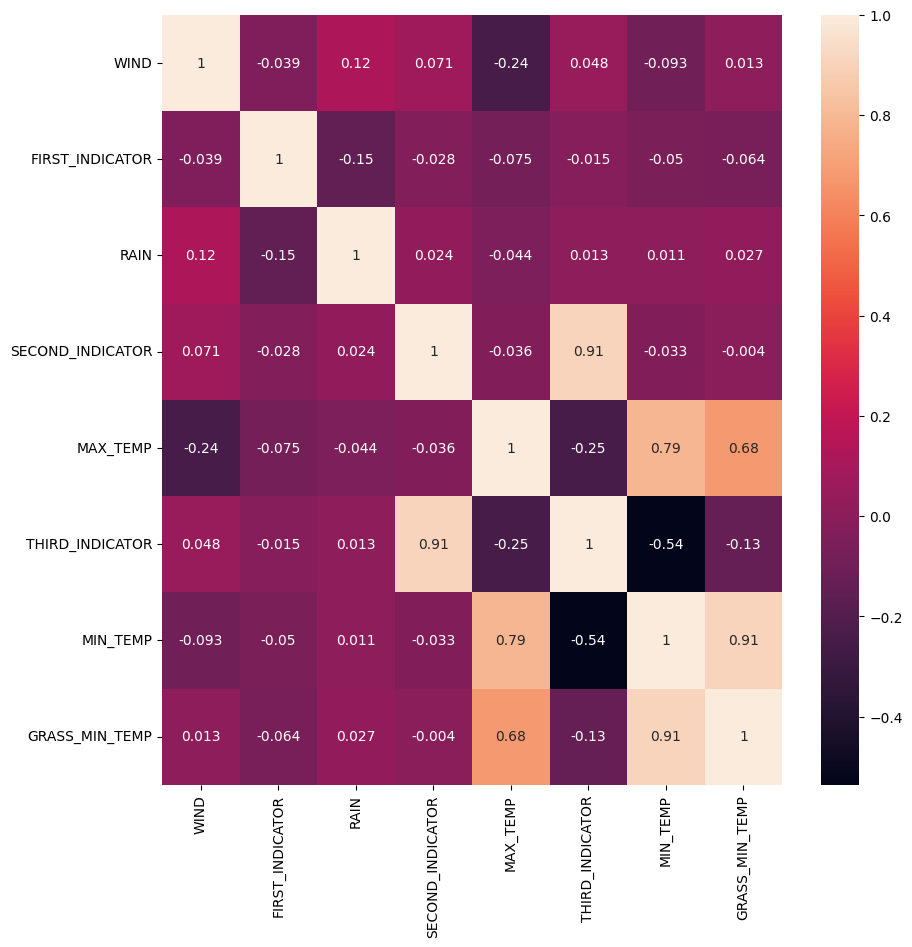

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

# Question 1

In [ ]:
data.isnull().sum()

DATE                  0
WIND                  0
FIRST_INDICATOR       0
RAIN                  0
SECOND_INDICATOR     61
MAX_TEMP            621
THIRD_INDICATOR      61
MIN_TEMP            674
GRASS_MIN_TEMP      360
dtype: int64

There are null values in many columns.

In [ ]:
data['SECOND_INDICATOR'].fillna(data['SECOND_INDICATOR'].mean(), inplace=True)
data['MAX_TEMP'].fillna(data['MAX_TEMP'].mean(), inplace=True)
data['THIRD_INDICATOR'].fillna(data['THIRD_INDICATOR'].mean(), inplace=True)
data['MIN_TEMP'].fillna(data['MIN_TEMP'].mean(), inplace=True)
data['GRASS_MIN_TEMP'].fillna(data['GRASS_MIN_TEMP'].median(), inplace=True)

To deal with the missing values, missing values were replaced with mean of the missing values and GRASS_MIN_TEMP column null values were replaced with the median. These values can be dropped as well.


# Distribution of wind speed in the dataset:

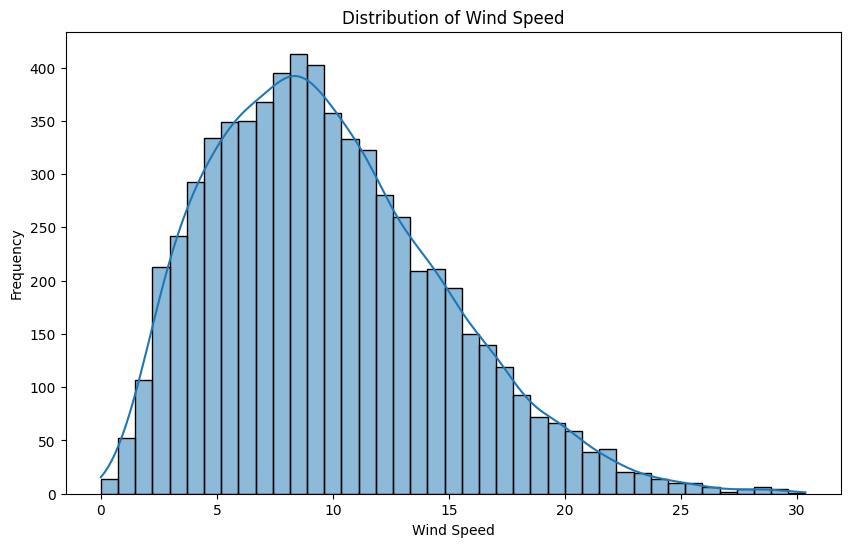

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['WIND'], kde=True)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.show()

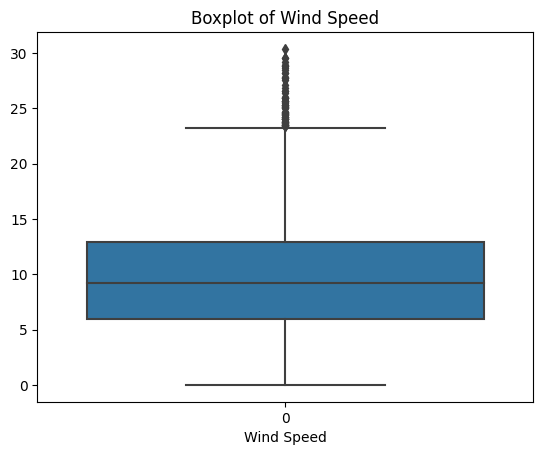

In [ ]:
sns.boxplot(data['WIND'])
plt.xlabel('Wind Speed')
plt.title('Boxplot of Wind Speed')
plt.show()

Observation:Most of the days, the wind speed lied in the range 8-10.
Most of the days experienced wind speeds in the range 1-20.
Some exceptions: wind speeds in the range 0-1,18-19,20-30 were experienced for less than 100 days.


# Question 2

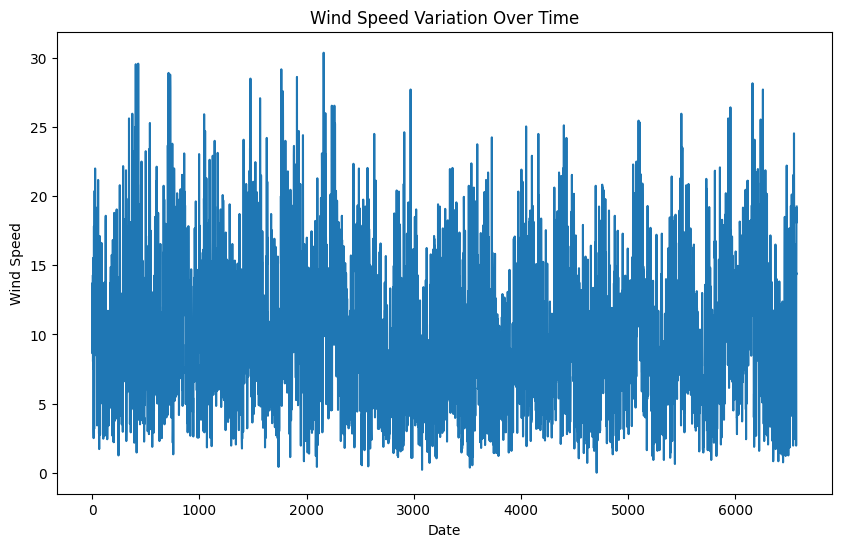

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['WIND'])
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Variation Over Time')
plt.show()

There is no specific pattern in the change of wind speed over time.

# Question 3

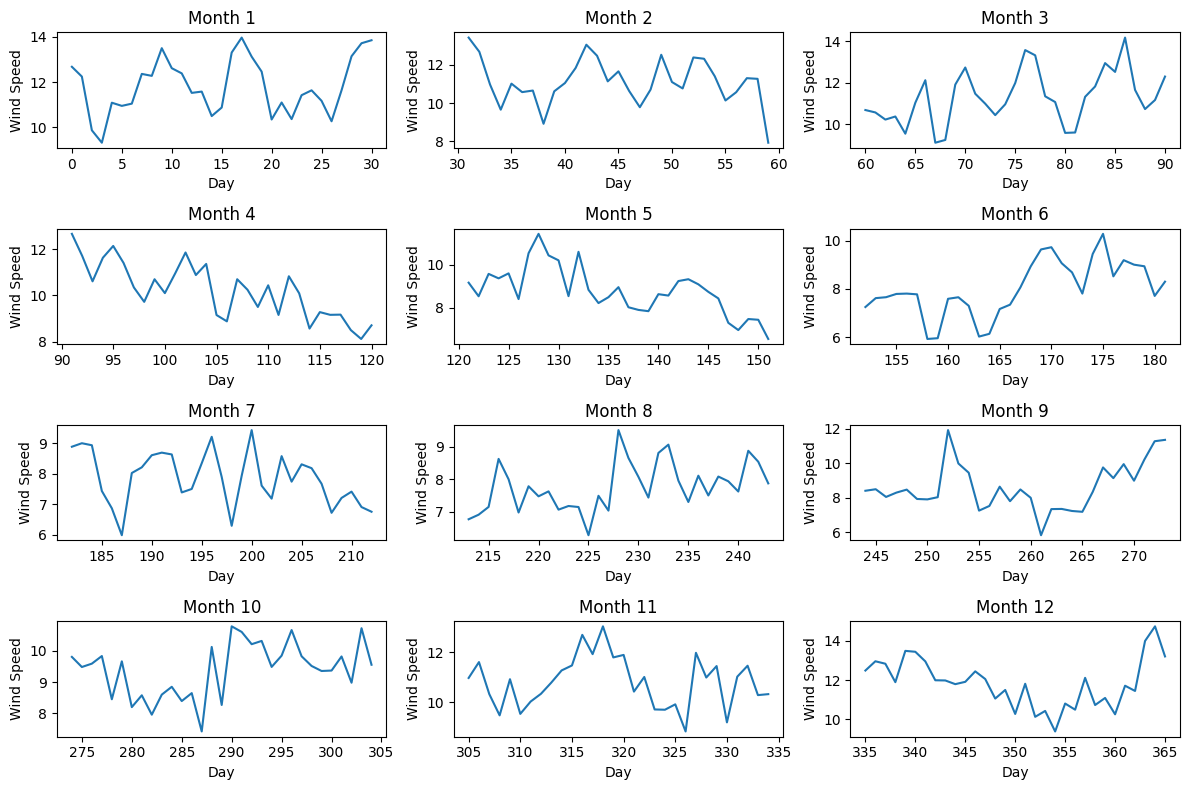

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['Month'] = data['DATE'].dt.month
data['Day'] = data['DATE'].dt.day
seasonal_data = data.groupby(['Month', 'Day'])['WIND'].mean().reset_index()
plt.figure(figsize=(12, 8))
for month in range(1, 13):
    subseries = seasonal_data[seasonal_data['Month'] == month]['WIND']
    plt.subplot(4, 3, month)
    plt.plot(subseries)
    plt.title('Month {}'.format(month))
    plt.xlabel('Day')
    plt.ylabel('Wind Speed')
plt.tight_layout()
plt.show()


Month 2,3,9,10,11 show the maximum speed of winds.

# Question 4

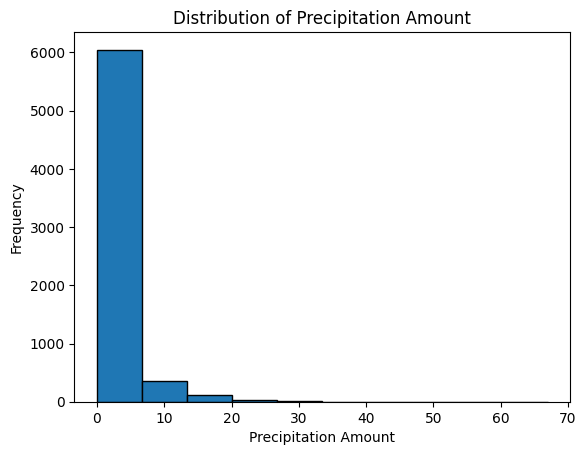

In [ ]:
plt.hist(data['RAIN'],edgecolor='black')
plt.xlabel('Precipitation Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation Amount')
plt.show()

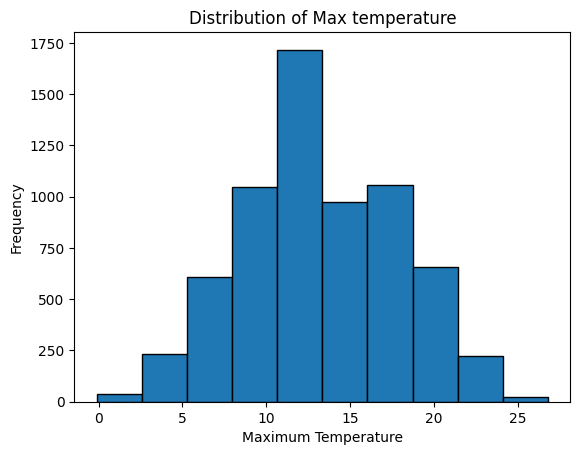

In [ ]:
plt.hist(data['MAX_TEMP'],edgecolor='black')
plt.xlabel('Maximum Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Max temperature')
plt.show()

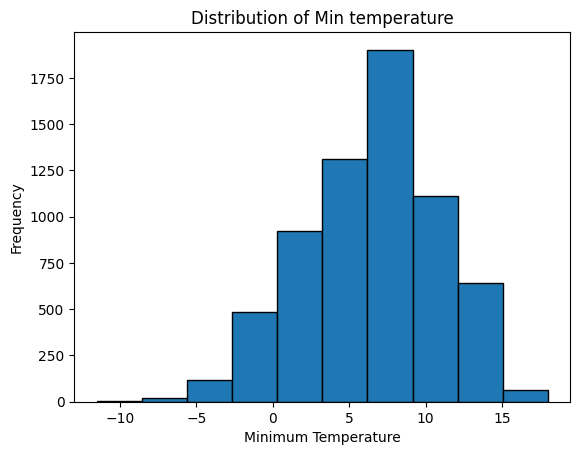

In [ ]:
plt.hist(data['MIN_TEMP'],edgecolor='black')
plt.xlabel('Minimum Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Min temperature')
plt.show()

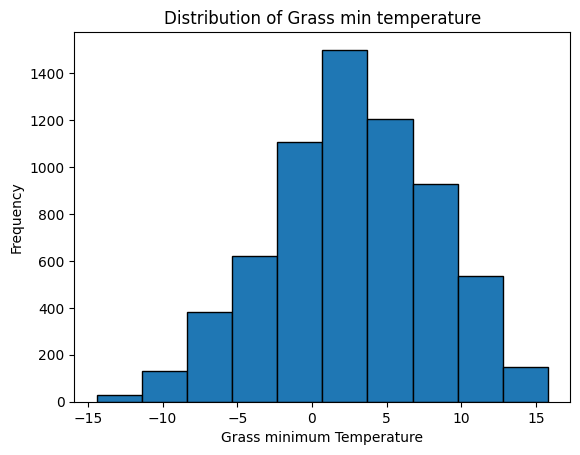

In [ ]:
plt.hist(data['GRASS_MIN_TEMP'],edgecolor='black')
plt.xlabel('Grass minimum Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Grass min temperature')
plt.show()

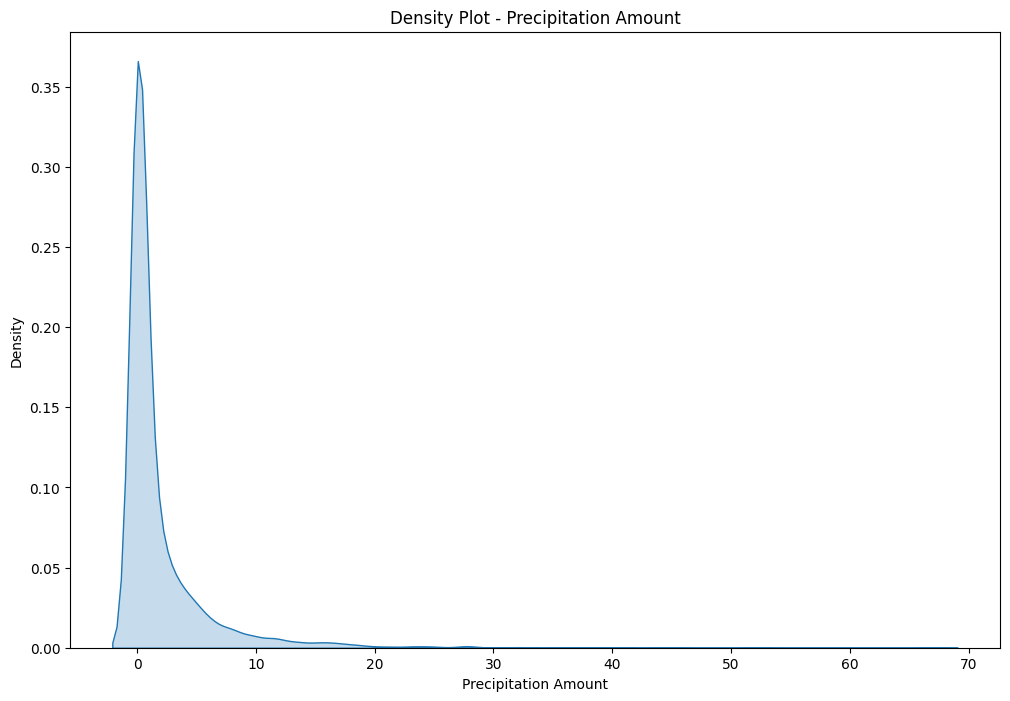

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='RAIN', fill=True)
plt.xlabel('Precipitation Amount')
plt.ylabel('Density')
plt.title('Density Plot - Precipitation Amount')
plt.show()

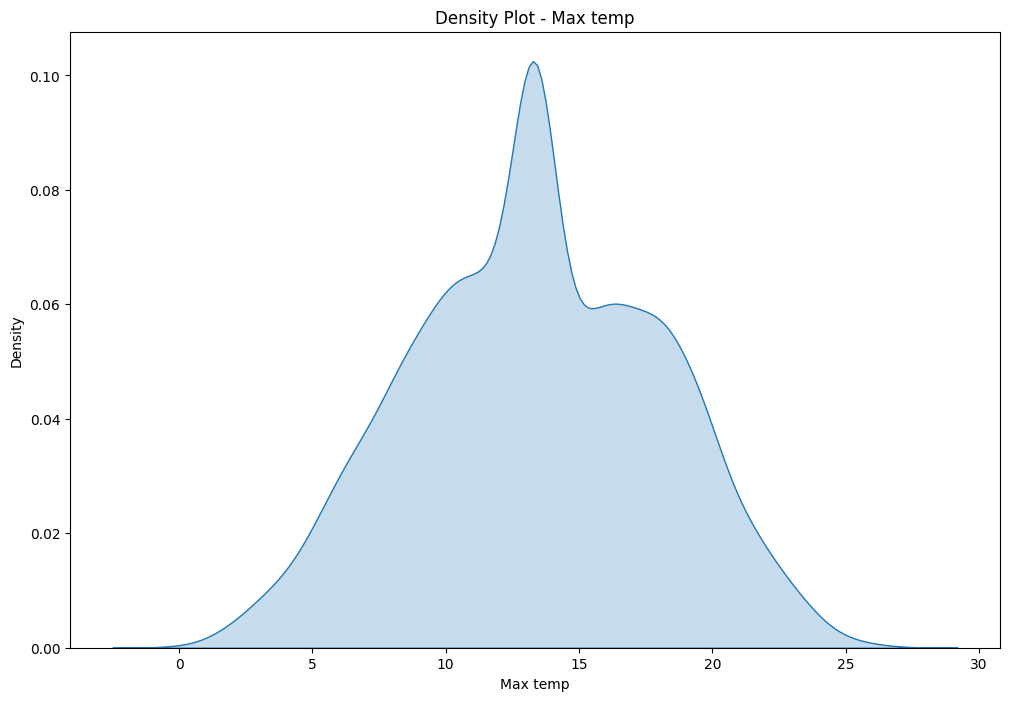

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='MAX_TEMP', fill=True)
plt.xlabel('Max temp')
plt.ylabel('Density')
plt.title('Density Plot - Max temp')
plt.show()

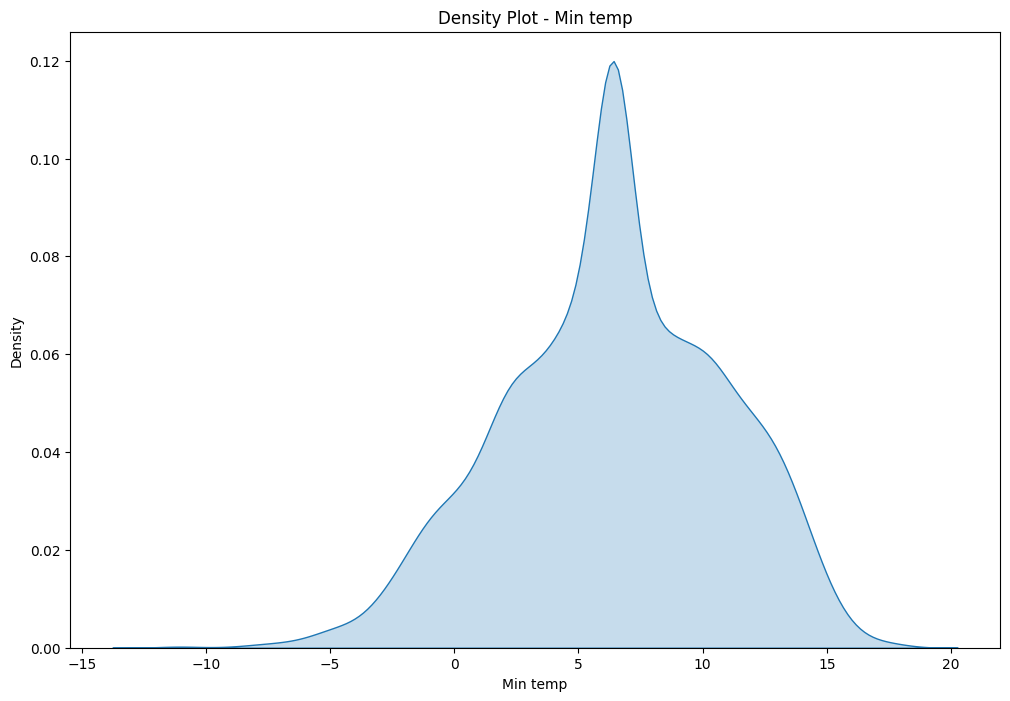

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='MIN_TEMP', fill=True)
plt.xlabel('Min temp')
plt.ylabel('Density')
plt.title('Density Plot - Min temp')
plt.show()

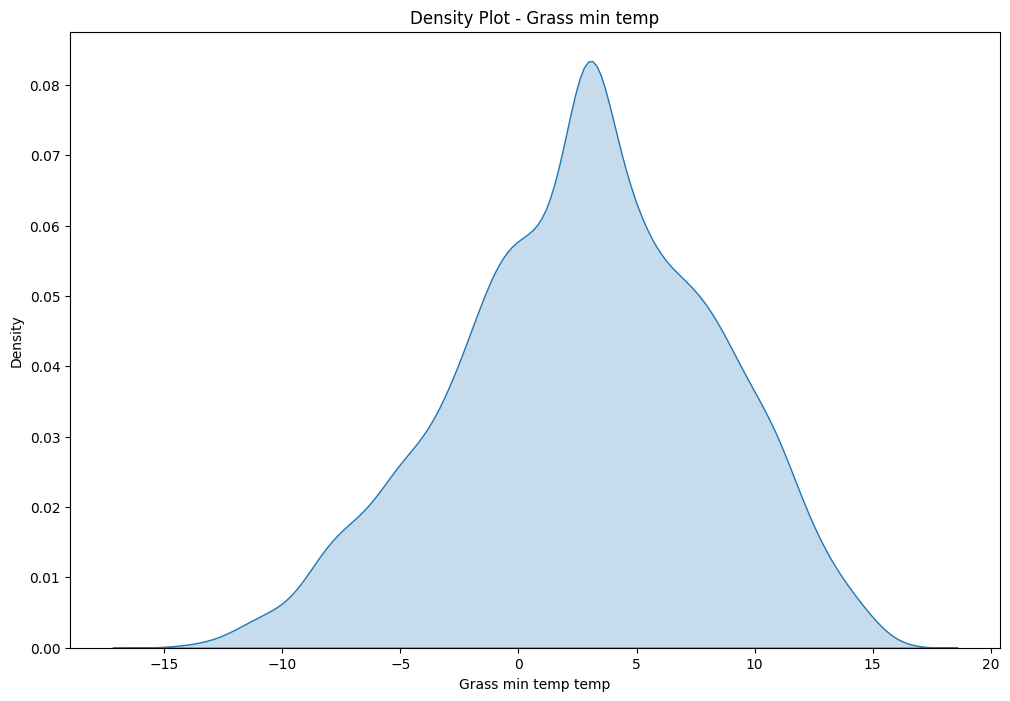

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='GRASS_MIN_TEMP', fill=True)
plt.xlabel('Grass min temp temp')
plt.ylabel('Density')
plt.title('Density Plot - Grass min temp')
plt.show()

Maximum frequency of rain is 6000.
Maximum temperature between 10-15 was most frequent.
Minimum temperature between 5-10 was most frequent.
Grass min temp between 0-5 was highest.


# Question 5

In [ ]:
print(data.columns)

Index(['DATE', 'WIND', 'FIRST_INDICATOR', 'RAIN', 'SECOND_INDICATOR',
       'MAX_TEMP', 'THIRD_INDICATOR', 'MIN_TEMP', 'GRASS_MIN_TEMP', 'Month',
       'Day'],
      dtype='object')


In [ ]:
#Calculating monthly average speed
monthly_average_wind_speed = data.groupby('Month')['WIND'].mean()

In [ ]:
#Temperature range for each day
temperature_range = data['MAX_TEMP'] - data['MIN_TEMP']

In [ ]:
#Monthly total rain
monthly_total_rainfall = data.groupby('Month')['RAIN'].sum()

In [ ]:
data.head()

,DATE,WIND,FIRST_INDICATOR,RAIN,SECOND_INDICATOR,MAX_TEMP,THIRD_INDICATOR,MIN_TEMP,GRASS_MIN_TEMP,Month,Day
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1,5


# Task 2
TASK 2 - Classification/Regression
Perform following steps on the same dataset which you used for EDA.

Data Preprocessing (as per requirement)
Feature Engineering
Split dataset in train-test (80:20 ratio)
Model selection
Model training
Model evaluation
Fine-tune the Model
Make predictions
Summarize your model's performance by evaluation metrices

In [ ]:
sns.pairplot(data)

In [ ]:
correlation = data.corr()['WIND']
correlation = correlation.sort_values(ascending=False)
print(correlation)

Since numerical value is to be predicted, using Linear Regression Algorithm to train the model.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

In [ ]:
X = data[['RAIN','SECOND_INDICATOR','THIRD_INDICATOR','GRASS_MIN_TEMP','Day','FIRST_INDICATOR','Month','MIN_TEMP','MAX_TEMP']]
y = data['WIND']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))